In [1]:
"""This script calculates the 95th percentiles for the distributions of kinematics data
This is used to scale the kinematics data to 0 and 1 to improve convergence during training
"""
import numpy as np
import pandas as pd

#read data
filename_dataport_ordered = 'dataport_ordered_corrupt_time.csv'
filename_dataport_randomized = 'dataport_randomized_corrupt_time.csv'
filename_r01_ordered = 'r01_ordered_corrupt_time.csv'
filename_r01_randomized = 'r01_randomized_corrupt_time.csv'


gait_data_r01_randomized = pd.read_csv(filename_r01_randomized)
gait_data_r01_ordered = pd.read_csv(filename_r01_ordered)
gait_data_dataport_ordered = pd.read_csv(filename_dataport_ordered)
gait_data_dataport_randomized = pd.read_csv(filename_dataport_randomized)

#aggregate dataframes
gait_data = pd.concat([gait_data_r01_ordered, gait_data_r01_randomized,\
                          gait_data_dataport_ordered, gait_data_dataport_randomized])

print(gait_data.head())

   foot_angle  foot_vel_angle  shank_angle  shank_vel_angle  heel_acc_forward  \
0    9.713109     -122.000000     6.810365       -54.155000          0.000000   
1    7.928249     -133.739183     5.993880       -61.785706         -3.391320   
2    7.120444     -147.077747     5.606053       -70.516308         -7.078094   
3    5.217823     -162.450106     4.621966       -84.205665         -3.548601   
4    3.440199     -167.100286     3.626258       -93.718654         -1.555049   

   heel_acc_upward     phase  speed  incline  is_stairs  is_moving  \
0         0.000000  0.000968    0.8    -10.0        0.0        1.0   
1         2.057084  0.013282    0.8    -10.0        0.0        1.0   
2         4.304541  0.018221    0.8    -10.0        0.0        1.0   
3         2.657375  0.028783    0.8    -10.0        0.0        1.0   
4         1.422208  0.038366    0.8    -10.0        0.0        1.0   

   stride_count  HSDetected  subj_id        dt      time  
0             1           1      

In [2]:
print(len(gait_data))

9285034


In [4]:
foot_angle = gait_data['foot_angle'].to_numpy()
foot_vel_angle = gait_data['foot_vel_angle'].to_numpy()
shank_angle = gait_data['shank_angle'].to_numpy()
shank_vel_angle = gait_data['shank_vel_angle'].to_numpy()
heel_acc_forward = gait_data['heel_acc_forward'].to_numpy()
heel_acc_upward = gait_data['heel_acc_upward'].to_numpy()

In [5]:
# calculate the percentiles for the kinematics
foot_angle_range = np.quantile(foot_angle, [0.01,0.99])
print(foot_angle_range)
foot_vel_angle_range = np.quantile(foot_vel_angle, [0.01,0.99])
print(foot_vel_angle_range)
shank_angle_range = np.quantile(shank_angle, [0.01,0.99])
print(shank_angle_range)
shank_vel_angle_range = np.quantile(shank_vel_angle, [0.01,0.99])
print(shank_vel_angle_range)
heel_acc_forward = np.quantile(heel_acc_forward, [0.01,0.99])
print(heel_acc_forward)
heel_acc_upward = np.quantile(heel_acc_upward, [0.01,0.99])
print(heel_acc_upward)

[-69.35951035  27.62815047]
[-456.18013759  401.13782617]
[-63.71649984  22.06632622]
[-213.4786175   396.93801619]
[-35.26603985  20.78473636]
[-20.95456523  14.63961137]


(array([0.000000e+00, 0.000000e+00, 6.000000e+00, 7.000000e+00,
        6.000000e+00, 6.000000e+00, 9.000000e+00, 1.800000e+01,
        2.500000e+01, 3.200000e+01, 3.500000e+01, 8.700000e+01,
        1.640000e+02, 9.220000e+02, 1.221600e+04, 1.578260e+05,
        7.726520e+05, 1.496870e+06, 1.933292e+06, 2.119914e+06,
        5.216380e+05, 2.435000e+05, 2.568340e+05, 2.921620e+05,
        3.531920e+05, 4.197110e+05, 3.838390e+05, 2.363740e+05,
        7.322000e+04, 9.344000e+03, 6.400000e+02, 7.100000e+01,
        4.400000e+01, 3.400000e+01, 3.200000e+01, 2.600000e+01,
        2.200000e+01, 2.000000e+01, 1.000000e+01]),
 array([-1000,  -950,  -900,  -850,  -800,  -750,  -700,  -650,  -600,
         -550,  -500,  -450,  -400,  -350,  -300,  -250,  -200,  -150,
         -100,   -50,     0,    50,   100,   150,   200,   250,   300,
          350,   400,   450,   500,   550,   600,   650,   700,   750,
          800,   850,   900,   950]),
 <BarContainer object of 39 artists>)

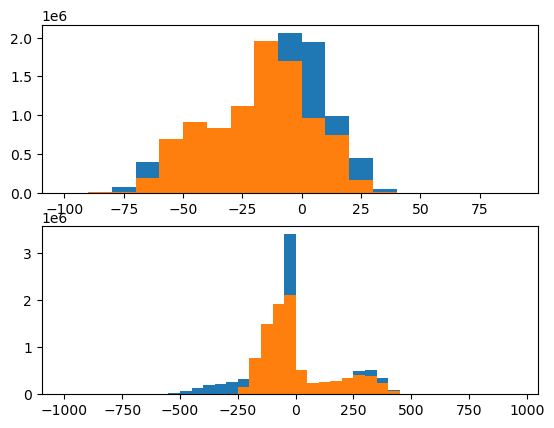

In [44]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,1)
axs[0].hist(foot_angle,bins=range(-100,100,10))
axs[0].hist(shank_angle,bins=range(-100,100,10))

axs[1].hist(foot_vel_angle,bins=range(-1000,1000,50))
axs[1].hist(shank_vel_angle,bins=range(-1000,1000,50))

0.09425519318401476
0.9240052995593389


(array([1.00000e+00, 2.00000e+00, 2.00000e+00, 1.00000e+00, 0.00000e+00,
        2.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00,
        2.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00,
        3.00000e+00, 1.00000e+00, 2.00000e+00, 2.00000e+00, 5.00000e+00,
        2.00000e+00, 2.00000e+00, 2.00000e+00, 2.00000e+00, 5.00000e+00,
        4.00000e+00, 1.00000e+00, 2.00000e+00, 8.00000e+00, 0.00000e+00,
        4.00000e+00, 4.00000e+00, 2.00000e+00, 3.00000e+00, 5.00000e+00,
        6.00000e+00, 3.00000e+00, 5.00000e+00, 2.00000e+00, 7.00000e+00,
        3.00000e+00, 7.00000e+00, 1.00000e+00, 6.00000e+00, 6.00000e+00,
        2.00000e+00, 6.00000e+00, 9.00000e+00, 9.00000e+00, 1.10000e+01,
        1.40000e+01, 4.00000e+00, 2.20000e+01, 8.00

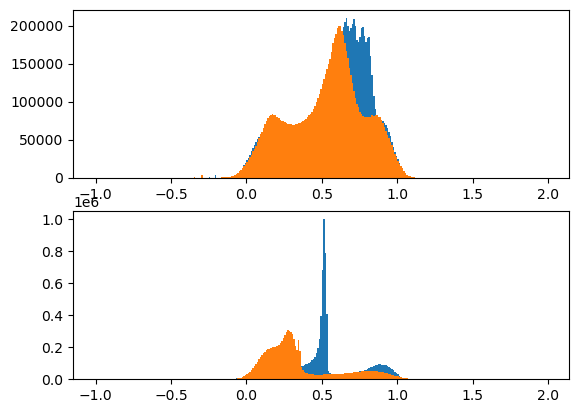

In [45]:
foot_angle_scale = (1 - 0)/(foot_angle_range[1] - foot_angle_range[0]) * ( foot_angle - foot_angle_range[0])
foot_vel_angle_scale = (1 - 0)/(foot_vel_angle_range[1] - foot_vel_angle_range[0]) * ( foot_vel_angle - foot_vel_angle_range[0])

shank_angle_scale = (1 - 0)/(shank_angle_range[1] - shank_angle_range[0]) * ( shank_angle - shank_angle_range[0])
shank_vel_angle_scale = (1 - 0)/(shank_vel_angle_range[1] - shank_vel_angle_range[0]) * ( shank_vel_angle - shank_vel_angle_range[0])
foot_angle_range = np.quantile(foot_angle_scale, [0.01,0.99])
print(foot_angle_range[0])
print(foot_angle_range[1])

fig, axs = plt.subplots(2,1)
axs[0].hist(foot_angle_scale,bins=np.arange(-1,2,0.01))
axs[0].hist(shank_angle_scale,bins=np.arange(-1,2,0.01))

axs[1].hist(foot_vel_angle_scale,bins=np.arange(-1,2,0.01))
axs[1].hist(shank_vel_angle_scale,bins=np.arange(-1,2,0.01))

